# Boston 자료분석

In [1]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [2]:
# 보스톤 근교 지역에서 팔린 506개 주택 가격 및 특징 (features)

boston_dataset = datasets.load_boston()
X_full = boston_dataset.data
Y = boston_dataset.target
print (X_full.shape)
print (Y.shape)

(506, 13)
(506,)


In [3]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

 - CRIM     per capita crime rate by town     타운별 1인당 범죄발생율
 - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.    25,000 평방 피트가 넘는 부지에 대한 주거용 토지의 비율
 - INDUS    proportion of non-retail business acres per town     타운당 비소매업 면적 (에이커)의 비율
 - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)     찰스 강 더미 변수 (트랙이 하천에 닿으면 1)
 - NOX      nitric oxides concentration (parts per 10 million)      일산화질소 농도 (천만 분의 1)
 - RM       average number of rooms per dwelling      주거당 평균 방수
 - AGE      proportion of owner-occupied units built prior to 1940      1940년 이전에 건축된 소유주 점유 주택의 비율
 - DIS      weighted distances to five Boston employment centres     5개의 보스턴 고용 센터까지의 가중 거리
 - RAD      index of accessibility to radial highways       방사형 고속도로 접근성 지수
 - TAX      full-value property-tax rate per `$10,000`      10,000 달러당 부동산세율
 - PTRATIO  pupil-teacher ratio by town     타운별 학생-교사 비율 (1 교사당 학생수)
 - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town     1000(Bk-0.63)^2, 여기서 Bk는 도시 별 흑인 비율
 - LSTAT    % lower status of the population     인구 중 하층 비율
 - MEDV     Median value of owner-occupied homes in `$1000's`     소유자 점유 주택의 중앙값 (단위: $1,000)

**참고**

**ppm**

백만분율은 수를 1,000,000과의 비로 나타내는 방법으로, ppm(parts per million)이라는 기호를 사용한다. ppm은 백만분의 1이라는 뜻이며, 고체시료의 농도를 나타낼 경우 1,000,000 mg(액체 1리터) 에 들어있는 용질의 mg수(또는 mg/kg)를 나타내며, 액체시료의 경우 용액의 밀도가 대부분 1mg/L라고 근사하여 1,000 ml 에 들어있는 용질의 mg수를 나타내기도 한다. 

ppm값을 10000으로 나누면 %(백분율)로 단위를 변환할 수 있다. 주로 대기나 해수, 지각 등에 존재하는 미량 성분의 농도를 나타낼 때 사용된다. 

예) 대기 중의 이산화탄소 농도 395 ppm = 395/1000000*100 = 0.0395 % 

**Parts-per notation**

https://en.wikipedia.org/wiki/Parts-per_notation

In science and engineering, the parts-per notation is a set of pseudo-units to describe small values of miscellaneous dimensionless quantities, e.g. mole fraction or mass fraction. Since these fractions are quantity-per-quantity measures, they are pure numbers with no associated units of measurement. Commonly used are parts-per-million (ppm, 10−6), parts-per-billion (ppb , 10−9), parts-per-trillion (ppt, 10−12) and parts-per-quadrillion (ppq, 10−15). This notation is not part of the International System of Units (SI) system and its meaning is ambiguous.

In [4]:
X_full[:5,]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

In [49]:
X_full

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [50]:
Y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [6]:
df = pd.DataFrame(X_full)

In [7]:
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [8]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [9]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [11]:
df.shape

(506, 13)

In [12]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [15]:
df.max()

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
dtype: float64

In [16]:
df.min()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
dtype: float64

In [17]:
df.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
dtype: float64

In [18]:
df.median()

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
dtype: float64

In [19]:
df.std()

CRIM         8.601545
ZN          23.322453
INDUS        6.860353
CHAS         0.253994
NOX          0.115878
RM           0.702617
AGE         28.148861
DIS          2.105710
RAD          8.707259
TAX        168.537116
PTRATIO      2.164946
B           91.294864
LSTAT        7.141062
dtype: float64

In [20]:
df.var()

CRIM          73.986578
ZN           543.936814
INDUS         47.064442
CHAS           0.064513
NOX            0.013428
RM             0.493671
AGE          792.358399
DIS            4.434015
RAD           75.816366
TAX        28404.759488
PTRATIO        4.686989
B           8334.752263
LSTAT         50.994760
dtype: float64

In [21]:
# 각 특징의 최대값의 인덱스 (행의 위치))
df.idxmax()

CRIM       380
ZN          57
INDUS      488
CHAS       142
NOX        142
RM         364
AGE          8
DIS        353
RAD        356
TAX        488
PTRATIO    354
B            0
LSTAT      374
dtype: int64

In [22]:
# 각 특징의 최솟값의 인덱스
df.idxmin()

CRIM         0
ZN           1
INDUS      195
CHAS         0
NOX        286
RM         365
AGE         41
DIS        372
RAD          0
TAX        353
PTRATIO    196
B          450
LSTAT      161
dtype: int64

In [23]:
# 첫 번째 행
df.loc[0]

CRIM         0.00632
ZN          18.00000
INDUS        2.31000
CHAS         0.00000
NOX          0.53800
RM           6.57500
AGE         65.20000
DIS          4.09000
RAD          1.00000
TAX        296.00000
PTRATIO     15.30000
B          396.90000
LSTAT        4.98000
Name: 0, dtype: float64

In [24]:
# 열별 합
df.sum()

CRIM         1828.44292
ZN           5750.00000
INDUS        5635.21000
CHAS           35.00000
NOX           280.67570
RM           3180.02500
AGE         34698.90000
DIS          1920.29160
RAD          4832.00000
TAX        206568.00000
PTRATIO      9338.50000
B          180477.06000
LSTAT        6402.45000
dtype: float64

In [28]:
# 열별 합
df.sum(axis = 0)

CRIM         1828.44292
ZN           5750.00000
INDUS        5635.21000
CHAS           35.00000
NOX           280.67570
RM           3180.02500
AGE         34698.90000
DIS          1920.29160
RAD          4832.00000
TAX        206568.00000
PTRATIO      9338.50000
B          180477.06000
LSTAT        6402.45000
dtype: float64

In [25]:
# 열별 합
df.sum(axis = 'rows')

CRIM         1828.44292
ZN           5750.00000
INDUS        5635.21000
CHAS           35.00000
NOX           280.67570
RM           3180.02500
AGE         34698.90000
DIS          1920.29160
RAD          4832.00000
TAX        206568.00000
PTRATIO      9338.50000
B          180477.06000
LSTAT        6402.45000
dtype: float64

In [26]:
# 행별 합
df.sum(axis = 1)

0      810.89932
1      765.69441
2      739.47839
3      702.80057
4      716.04625
         ...    
501    787.39723
502    798.63577
503    810.24726
504    806.02549
505    801.66541
Length: 506, dtype: float64

In [27]:
# 행별 합
df.sum(axis = 'columns')

0      810.89932
1      765.69441
2      739.47839
3      702.80057
4      716.04625
         ...    
501    787.39723
502    798.63577
503    810.24726
504    806.02549
505    801.66541
Length: 506, dtype: float64

In [29]:
# 열별 누적합 (cumulative sum)
df.cumsum()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.5380,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.03363,18.0,9.38,0.0,1.0070,12.996,144.1,9.0571,3.0,538.0,33.1,793.80,14.12
2,0.06092,18.0,16.45,0.0,1.4760,20.181,205.2,14.0242,5.0,780.0,50.9,1186.63,18.15
3,0.09329,18.0,18.63,0.0,1.9340,27.179,251.0,20.0864,8.0,1002.0,69.6,1581.26,21.09
4,0.16234,18.0,20.81,0.0,2.3920,34.326,305.2,26.1486,11.0,1224.0,88.3,1978.16,26.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1828.17989,5750.0,5587.49,35.0,278.3837,3154.105,34361.1,1910.9427,4828.0,205476.0,9254.5,178892.91,6373.37
502,1828.22516,5750.0,5599.42,35.0,278.9567,3160.225,34437.8,1913.2302,4829.0,205749.0,9275.5,179289.81,6382.45
503,1828.28592,5750.0,5611.35,35.0,279.5297,3167.201,34528.8,1915.3977,4830.0,206022.0,9296.5,179686.71,6388.09
504,1828.39551,5750.0,5623.28,35.0,280.1027,3173.995,34618.1,1917.7866,4831.0,206295.0,9317.5,180080.16,6394.57


In [30]:
# 첫 번째 행, 첫 번째 열 요소
df.loc[0][0]

0.00632

In [32]:
df.iloc[0][0]

0.00632

In [31]:
df.loc[0]['CRIM']

0.00632

In [33]:
# 특징 'AGE'
df['AGE']

0      65.2
1      78.9
2      61.1
3      45.8
4      54.2
       ... 
501    69.1
502    76.7
503    91.0
504    89.3
505    80.8
Name: AGE, Length: 506, dtype: float64

(array([ 14.,  31.,  29.,  42.,  32.,  38.,  39.,  42.,  71., 168.]),
 array([  2.9 ,  12.61,  22.32,  32.03,  41.74,  51.45,  61.16,  70.87,
         80.58,  90.29, 100.  ]),
 <a list of 10 Patch objects>)

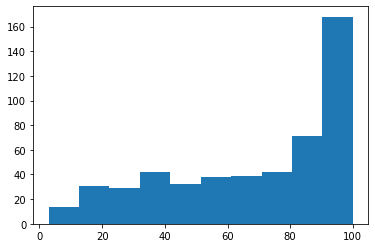

In [34]:
plt.hist(df['AGE'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e554b4db08>,
 'caps': [<matplotlib.lines.Line2D at 0x1e554b53dc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e554b4d348>],
 'medians': [<matplotlib.lines.Line2D at 0x1e554b53f88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e554b59e88>],
 'means': []}

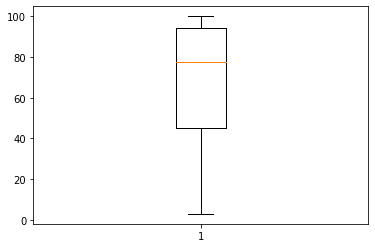

In [35]:
plt.boxplot(df['AGE'])

In [36]:
# 짝수 행 레코드만 보여줌
df[df.index % 2 == 0]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0.28960,0.0,9.69,0.0,0.585,5.390,72.9,2.7986,6.0,391.0,19.2,396.90,21.14
498,0.23912,0.0,9.69,0.0,0.585,6.019,65.3,2.4091,6.0,391.0,19.2,396.90,12.92
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08


In [37]:
df[df['AGE'] > 95]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
20,1.25179,0.0,8.14,0.0,0.538,5.570,98.1,3.7979,4.0,307.0,21.0,376.57,21.02
23,0.98843,0.0,8.14,0.0,0.538,5.813,100.0,4.0952,4.0,307.0,21.0,394.54,19.88
31,1.35472,0.0,8.14,0.0,0.538,6.072,100.0,4.1750,4.0,307.0,21.0,376.73,13.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,15.02340,0.0,18.10,0.0,0.614,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
478,10.23300,0.0,18.10,0.0,0.614,6.185,96.7,2.1705,24.0,666.0,20.2,379.70,18.03
489,0.18337,0.0,27.74,0.0,0.609,5.414,98.3,1.7554,4.0,711.0,20.1,344.05,23.97
490,0.20746,0.0,27.74,0.0,0.609,5.093,98.0,1.8226,4.0,711.0,20.1,318.43,29.68


In [38]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [39]:
df[df['AGE'] > 95].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,111.0,9.131193,12.525663,0.09849,1.20826,5.87205,11.7645,73.5341
ZN,111.0,0.585586,3.125317,0.00000,0.00000,0.00000,0.0000,20.0000
INDUS,111.0,17.862342,4.606760,2.46000,18.10000,18.10000,19.5800,27.7400
CHAS,111.0,0.063063,0.244179,0.00000,0.00000,0.00000,0.0000,1.0000
NOX,111.0,0.664649,0.093411,0.44800,0.60500,0.65900,0.7000,0.8710
RM,111.0,5.940144,0.712860,3.86300,5.49400,6.00600,6.4030,7.9290
AGE,111.0,98.280180,1.657864,95.20000,96.95000,98.40000,100.0000,100.0000
DIS,111.0,1.999828,0.873839,1.13700,1.52335,1.80260,2.1088,6.0821
RAD,111.0,15.153153,9.832412,2.00000,5.00000,24.00000,24.0000,24.0000
TAX,111.0,541.459459,156.998482,188.00000,403.00000,666.00000,666.0000,711.0000


In [40]:
# 상관(계수)행렬 (Correlation Matrix)
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [41]:
# 분산-공분산행렬 (Variance-covariance Matrix)
df.cov()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,73.986578,-40.215956,23.992339,-0.122109,0.419594,-1.325038,85.405322,-6.876722,46.847761,844.821538,5.399331,-302.381816,27.986168
ZN,-40.215956,543.936814,-85.412648,-0.252925,-1.396148,5.112513,-373.901548,32.629304,-63.348695,-1236.453735,-19.776571,373.721402,-68.783037
INDUS,23.992339,-85.412648,47.064442,0.109669,0.607074,-1.887957,124.513903,-10.228097,35.549971,833.360290,5.692104,-223.579756,29.580270
CHAS,-0.122109,-0.252925,0.109669,0.064513,0.002684,0.016285,0.618571,-0.053043,-0.016296,-1.523367,-0.066819,1.131325,-0.097816
NOX,0.419594,-1.396148,0.607074,0.002684,0.013428,-0.024603,2.385927,-0.187696,0.616929,13.046286,0.047397,-4.020570,0.488946
RM,-1.325038,5.112513,-1.887957,0.016285,-0.024603,0.493671,-4.751929,0.303663,-1.283815,-34.583448,-0.540763,8.215006,-3.079741
AGE,85.405322,-373.901548,124.513903,0.618571,2.385927,-4.751929,792.358399,-44.329379,111.770846,2402.690122,15.936921,-702.940328,121.077725
DIS,-6.876722,32.629304,-10.228097,-0.053043,-0.187696,0.303663,-44.329379,4.434015,-9.068252,-189.664592,-1.059775,56.040356,-7.473329
RAD,46.847761,-63.348695,35.549971,-0.016296,0.616929,-1.283815,111.770846,-9.068252,75.816366,1335.756577,8.760716,-353.276219,30.385442
TAX,844.821538,-1236.453735,833.360290,-1.523367,13.046286,-34.583448,2402.690122,-189.664592,1335.756577,28404.759488,168.153141,-6797.911215,654.714520


**pandas.DataFrame.sort_values 정렬**

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

* DataFrame 정렬: DataFrame.sort_values()
* Tuple 정렬: sorted(tuple, key)
* List 정렬: list.sort(), sorted(list)

In [42]:
df.sort_values(by='ZN')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
505,0.04741,0.0,11.93,0.0,0.5730,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88
439,9.39063,0.0,18.10,0.0,0.7400,5.627,93.9,1.8172,24.0,666.0,20.2,396.90,22.88
440,22.05110,0.0,18.10,0.0,0.7400,5.818,92.4,1.8662,24.0,666.0,20.2,391.45,22.11
441,9.72418,0.0,18.10,0.0,0.7400,6.406,97.2,2.0651,24.0,666.0,20.2,385.96,19.52
442,5.66637,0.0,18.10,0.0,0.7400,6.219,100.0,2.0048,24.0,666.0,20.2,395.69,16.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.03510,95.0,2.68,0.0,0.4161,7.853,33.2,5.1180,4.0,224.0,14.7,392.78,3.81
200,0.01778,95.0,1.47,0.0,0.4030,7.135,13.9,7.6534,3.0,402.0,17.0,384.30,4.45
199,0.03150,95.0,1.47,0.0,0.4030,6.975,15.3,7.6534,3.0,402.0,17.0,396.90,4.56
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88


In [43]:
df.sort_values(by='ZN', ascending=False)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
57,0.01432,100.0,1.32,0.0,0.4110,6.816,40.5,8.3248,5.0,256.0,15.1,392.90,3.95
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88
203,0.03510,95.0,2.68,0.0,0.4161,7.853,33.2,5.1180,4.0,224.0,14.7,392.78,3.81
200,0.01778,95.0,1.47,0.0,0.4030,7.135,13.9,7.6534,3.0,402.0,17.0,384.30,4.45
199,0.03150,95.0,1.47,0.0,0.4030,6.975,15.3,7.6534,3.0,402.0,17.0,396.90,4.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.12204,0.0,2.89,0.0,0.4450,6.625,57.8,3.4952,2.0,276.0,18.0,357.98,6.65
96,0.11504,0.0,2.89,0.0,0.4450,6.163,69.6,3.4952,2.0,276.0,18.0,391.83,11.34
97,0.12083,0.0,2.89,0.0,0.4450,8.069,76.0,3.4952,2.0,276.0,18.0,396.90,4.21
98,0.08187,0.0,2.89,0.0,0.4450,7.820,36.9,3.4952,2.0,276.0,18.0,393.53,3.57


In [45]:
# inplace = True: 메모리에 저정되어 있는 데이터를 영구적으로 정렬함
df.sort_values(by='ZN', inplace = True)

In [46]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
505,0.04741,0.0,11.93,0.0,0.5730,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88
2,0.02729,0.0,7.07,0.0,0.4690,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.4580,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
5,0.02985,0.0,2.18,0.0,0.4580,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
13,0.62976,0.0,8.14,0.0,0.5380,5.949,61.8,4.7075,4.0,307.0,21.0,396.90,8.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88
203,0.03510,95.0,2.68,0.0,0.4161,7.853,33.2,5.1180,4.0,224.0,14.7,392.78,3.81
200,0.01778,95.0,1.47,0.0,0.4030,7.135,13.9,7.6534,3.0,402.0,17.0,384.30,4.45
199,0.03150,95.0,1.47,0.0,0.4030,6.975,15.3,7.6534,3.0,402.0,17.0,396.90,4.56


In [47]:
# fit() 메서드와 get_support() 메서드 사용

selector = SelectKBest(f_regression, k=1)
selector.fit(X_full, Y)

X = X_full[:, selector.get_support()]
print (X.shape)

(506, 1)


**SelectKBest() 함수**

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

In [48]:
# X:13 번째 특징 (LSTAT)
X

array([[ 4.98],
       [ 9.14],
       [ 4.03],
       [ 2.94],
       [ 5.33],
       [ 5.21],
       [12.43],
       [19.15],
       [29.93],
       [17.1 ],
       [20.45],
       [13.27],
       [15.71],
       [ 8.26],
       [10.26],
       [ 8.47],
       [ 6.58],
       [14.67],
       [11.69],
       [11.28],
       [21.02],
       [13.83],
       [18.72],
       [19.88],
       [16.3 ],
       [16.51],
       [14.81],
       [17.28],
       [12.8 ],
       [11.98],
       [22.6 ],
       [13.04],
       [27.71],
       [18.35],
       [20.34],
       [ 9.68],
       [11.41],
       [ 8.77],
       [10.13],
       [ 4.32],
       [ 1.98],
       [ 4.84],
       [ 5.81],
       [ 7.44],
       [ 9.55],
       [10.21],
       [14.15],
       [18.8 ],
       [30.81],
       [16.2 ],
       [13.45],
       [ 9.43],
       [ 5.28],
       [ 8.43],
       [14.8 ],
       [ 4.81],
       [ 5.77],
       [ 3.95],
       [ 6.86],
       [ 9.22],
       [13.15],
       [14.44],
       [

In [51]:
# X:13 번째 특징 (LSTAT)
X[:5]

array([[4.98],
       [9.14],
       [4.03],
       [2.94],
       [5.33]])

In [53]:
Y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [52]:
Y[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

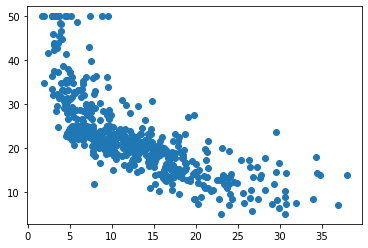

In [54]:
plt.scatter(X, Y)

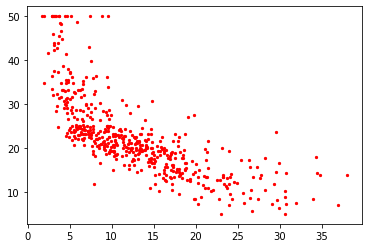

In [55]:
plt.scatter(X, Y, s=5, marker='o', color='red')

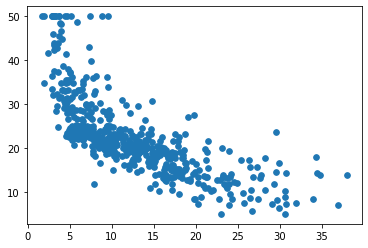

In [56]:
def plot_scatter(X,Y,R=None):
        plt.scatter(X, Y, s=32, marker='o')
        if R is not None:
                plt.scatter(X, R, color='red', linewidth=0.5)
        plt.show()

plot_scatter(X,Y)

### 단순선형회귀분석 (Simple Linear Regression)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

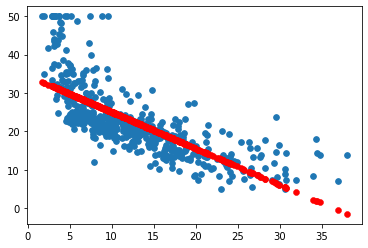

In [57]:
regressor = LinearRegression(normalize=True).fit(X, Y)
plot_scatter(X, Y, regressor.predict(X))

In [58]:
print("slope = ",regressor.coef_)
print("y-intercept = ", regressor.intercept_)

slope =  [-0.95004935]
y-intercept =  34.55384087938311


### SVM (Support Vector Machine)--based regression

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html    

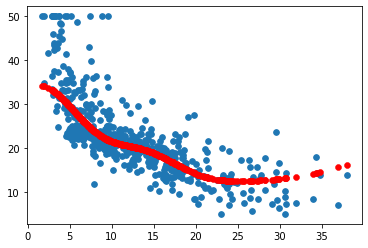

In [59]:
regressor = SVR().fit(X, Y)
plot_scatter(X, Y, regressor.predict(X))

### Random Forest-based regression 

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

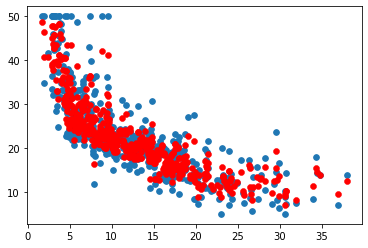

In [60]:
regressor = RandomForestRegressor().fit(X, Y)
plot_scatter(X, Y, regressor.predict(X))